In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

differentialcond (generic function with 1 method)

In [2]:
Ts=collect(50.01:10:1200.01)
#Ts=collect(663.8:0.01:664.0)#[663.0,663.1]
numofn=[-1.5e20]#,-7.3e19,-2.0e19,-0.15e19]#,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]#,1e17,1e17,1e17]#,1e17]
xs=[0.287]#,0.3,0.3,0.3]#[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=5.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x
alphanp=0.0#1/EgSiGe([Ts[1],xs[1]])


effMassV(var)=-1.2*me
effMassC(var)=1.4/6^(2/3)*me#0.321me#0.424*me#0.424*me#1.4/6^(2/3)*me

bandC=parBandTx(1.0,effMassC(var0),alphanp,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(1.0,effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandV],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI var[10]:bandV

md=effMassC([Ts[1],xs[1]])*6^(2/3)#1.4*me;
function Deftemp(band::parBandTx)
    Da=7.0
    Dv=3.8
    if band==bandC
        return [Da,Dv]#10.5#15.0
    end
    if band==bandV        
        return [Dv,Da]#7.0
    end
end
ksi=21.0
#tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],Deftemp(var[6])[2],var[2],var[1],var[3],var[6])#DefP(var[1])
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,tauII2,tauNI
xmax=3.0
#T_EF_Dict=Dict()
#println("-3")

3.0

In [3]:
1.4/6^(2/3)*me

3.8623313061392607e-31

In [4]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 22

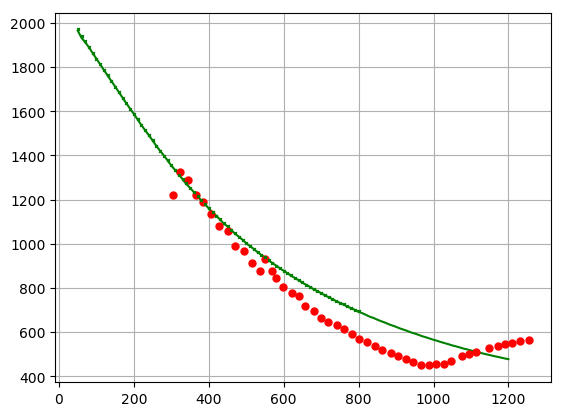

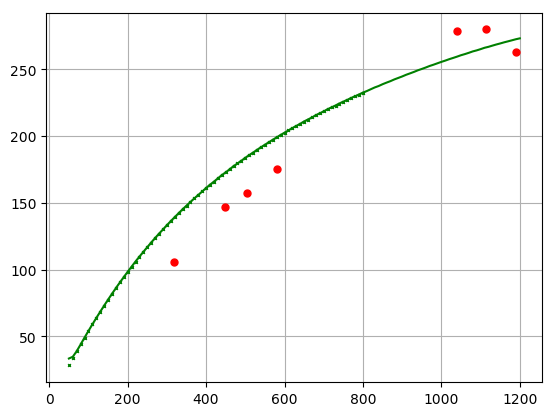

In [5]:
SiGe_Suin_EC_T=[50.0100000000000,60.0100000000000,70.0100000000000,80.0100000000000,90.0100000000000,100.010000000000,
110.010000000000,120.010000000000,130.010000000000,140.010000000000,150.010000000000,160.010000000000,170.010000000000,
180.010000000000,190.010000000000,200.010000000000,210.010000000000,220.010000000000,230.010000000000,240.010000000000,
250.010000000000,260.010000000000,270.010000000000,280.010000000000,290.010000000000,300.010000000000,310.010000000000,
320.010000000000,330.010000000000,340.010000000000,350.010000000000,360.010000000000,370.010000000000,380.010000000000,
390.010000000000,400.010000000000,410.010000000000,420.010000000000,430.010000000000,440.010000000000,450.010000000000,
460.010000000000,470.010000000000,480.010000000000,490.010000000000,500.010000000000,510.010000000000,520.010000000000,
530.010000000000,540.010000000000,550.010000000000,560.010000000000,570.010000000000,580.010000000000,590.010000000000,
600.010000000000,610.010000000000,620.010000000000,630.010000000000,640.010000000000,650.010000000000,660.010000000000,
670.010000000000,680.010000000000,690.010000000000,700.010000000000,710.010000000000,720.010000000000,730.010000000000,
740.010000000000,750.010000000000,760.010000000000,770.010000000000,780.010000000000,790.010000000000,800.010000000000]

SiGe_Suin_Green_EC_E=[197056.235797164,194320.869638783,191639.726004170,189004.089980826,186404.129258986,183831.389714421,
181278.561149160,178739.838327999,176211.078554261,173689.820032834,171175.087928433,168667.170965295,166167.387785872,
163677.780145979,161200.893579582,158739.569628146,156296.773858473,153875.463875003,151478.490325157,149108.525922849,
146768.017906391,144459.159338732,142183.875109414,139943.819068554,137740.379339050,135574.689421683,133447.643191776,
131359.912309890,129311.964919516,127304.084786733,125336.390268020,123408.852670586,121521.313710611,119673.501882254,
117865.047631702,116095.497291016,114364.325770554,112670.948039989,111014.729449324,109394.994954804,107811.037323671,
106262.124394220,104747.505469873,103266.416923878,101818.087088848,100401.740501025,99016.6015656697,97661.8977043105,
96336.8620403833,95040.7356748171,93772.7695985254,92532.2262843721,91318.3809970343,90130.5228553333,88967.9556780466,
87829.9986409496,86715.9867698647,85625.2712917903,84557.2198637538,83511.2166968223,82486.6625908072,81482.9748932318,
80499.5873949161,79535.9501727694,78591.5293893648,77665.8070576933,76758.2807785317,75868.4634569961,74995.8830040928,
74140.0820284097,73300.6175224935,72477.0605479449,71668.9959227969,70876.0219143384,70097.7499401889,69333.8042801100]

SiGe_Suin_Blue_EC_E=[105217.718423598,103894.351590207,102597.378241505,101326.103752608,100076.690205017,98847.7335877961,97637.2784136888,
96443.5832046020,95265.1079304967,94100.5283678664,92948.7829164667,91809.0016256134,90680.5818602652,89563.0857717702,
88456.2529938136,87359.9754708476,86274.2533521397,85199.1751237078,84134.8966696508,83081.6197375549,82039.5744885061,
81009.0055398650,79990.1607327244,78983.2822128468,77988.5995736031,77006.3247748143,76036.6485395295,75079.7379700720,
74135.7351443028,73204.7564993546,72286.8928226126,71382.2097211777,70490.7484441301,69612.5269642873,68747.5412407379,
67895.7665996923,67057.1591831364,66231.6574263637,65419.1835337387,64619.6449294639,63832.9356659927,63058.9377775023,
62297.5225696718,61548.5518400721,60811.8790258860,60087.3502775685,59374.8054585196,58674.0790719648,57985.0011169990,
57307.3978765571,56641.0926401712,55985.9063649732,55341.6582783843,54708.1664260703,54085.2481687875,53472.7206315772,
52870.4011089235,52278.1074291506,51695.6582813696,51122.8735081021,50559.5743665851,50005.5837616225,49460.7264527182,
48924.8292380895,48397.7211180361,47879.2334400197,47369.2000276938,46867.4572960151,46373.8443544707,45888.2031003578,
45410.3783039662,44940.2176874331,44477.5719989557,44022.2950840000,43574.2439550117,43133.2788611721]

SiGe_Vin_162_Bulk_EC_T=[304.367,321.834,343.668,365.502,385.153,404.803,426.638,450.655,470.306,494.323,513.974,
535.808,551.092,568.559,579.476,599.127,620.961,640.611,658.079,679.913,699.563,719.214,741.048,760.699,782.533,
802.183,821.834,843.668,863.319,885.153,904.803,926.638,946.288,965.939,987.773,1007.42,1027.07,1046.72,1075.11,
1094.76,1114.41,1149.34,1171.18,1190.83,1210.48,1232.31,1254.15]

SiGe_Vin_162_Bulk_EC_E=[121943.783915615,132463.665216631,128860.001340144,122140.388162154,119063.352419189,
113297.757837372,108070.254310922,105664.795343141,98940.3488636701,96919.886022214,91232.5517744731,
87811.7316473481,93134.1504302798,87866.513193157,84672.5711672961,80299.3559991649,77637.3404552654,
76382.5236785823,71676.8806221553,69548.7675958382,66570.3615436335,64728.6896971345,62988.1582262535,
61336.8990517315,59010.2795907047,56852.0992637653,55503.4439886995,53591.7168642415,51805.6872283439,
50684.7509858184,49084.3317904492,47583.2468904348,46634.8306222952,45276.5263848958,44847.8760045924,
45294.9835805685,45303.6020894021,46681.8538297793,49173.153425156,50250.2462262065,50812.2335533503,
52561.5890419599,53795.2552584862,54439.8412534229,55100.0617120691,55777.7368741041,56472.6079615083]

SiGe_Vin_162_Bulk_SC_T=[318.66,446.9,505.1,582,1039,1113,1190]

SiGe_Vin_162_Bulk_SC_S=[105.96,146.7,157.6,175.6,278.9,279.8,262.7]

SiGe_Suin_Green_SC_S=[-28.2132575298493,-33.5925881256826,-38.8771232854833,-44.0651452132133,-49.1549450862041,-54.1446381562074,
-59.0325764866401,-63.8174205217953,-68.4983548257349,-73.0749265596210,-77.5473314747416,-81.9161618676952,-86.1824859250074,
-90.3477637054734,-94.4137621099529,-98.3825037850517,-102.256207198424,-106.037231736795,-109.728031955462,-113.331119491578,
-116.849031733514,-120.284306581947,-123.639462520660,-126.916983190737,-130.119305709907,-133.248812058927,-136.307822951565,
-139.298593692647,-142.223311610188,-145.084094721423,-147.882991354191,-150.621980499099,-153.302972712010,-155.927811423192,
-158.498274539421,-161.016076249723,-163.482868965103,-165.900245338328,-168.269740322444,-170.592833236753,
-172.870949816508,-175.105464229379,-177.297701045960,-179.448937155692,-181.560403622242,-183.633287474864,-185.668733433395,
-187.667845566260,-189.631688881362,-191.561290850435,-193.457642867738,-195.321701644161,-197.154390537789,-198.956600821929,
-200.729192891335,-202.472997407169,-204.188816380815,-205.877424196341,-207.539568570901,-209.175971451960,-210.787329849626,
-212.374316602060,-213.937581071116,-215.477749765105,-216.995426884935,-218.491194789365,-219.965614374679,-221.419225363595,
-222.852546497813,-224.266075628246,-225.660289696625,-227.035644601920,-228.392574944807,-229.731493643252,-231.052791412249,
-232.356836100718]
figure()
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="g")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="b")
plot(SiGe_Vin_162_Bulk_EC_T,SiGe_Vin_162_Bulk_EC_E/100,linestyle="None",marker=".",markersize=10,color="r")
plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
grid()

In [6]:
#map(i->println(sigmas[i,1,1]/6^(2/3)),1:length(sigmas[:,1,1]))

In [7]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))

In [8]:
Efsr

116×1×1 Array{Float64,3}:
[:, :, 1] =
  0.0732565
  0.0731812
  0.0731178
  0.0730027
  0.0728314
  0.0726768
  0.0724991
  0.0722793
  0.0720576
  0.0718171
  0.0715464
  0.0712507
  0.0709344
  ⋮        
 -0.0440345
 -0.0459457
 -0.0478637
 -0.0497881
 -0.0517183
 -0.0536536
 -0.0555933
 -0.0575368
 -0.0594832
 -0.0614317
 -0.0633814
 -0.0653313

In [9]:
sigmaetest=[2778200.28109668,2312314.78954883,1979047.65108095,
1728673.76291633,1533555.01584136,1377114.43355248,
1248805.37673395,1141599.77536841,1050634.83341348,
972439.919995827,904471.685107134,844824.119432157,792040.704331033,
744989.051108251,702775.404932162,664684.741110955,630138.029017717,
598661.203865750,569862.264585959,543414.122446974,519041.586412879,
496511.367377109,475624.315110431,456209.326943280,438118.522494679,
421223.387385095,405411.665863276,390584.837576167,376656.053874064,
363548.438528403,351193.679615310,339530.855692561,328505.451770088,
318068.529998983,308176.027240837,298788.157277877,289868.899786311,
281385.561616717,273308.398626170,265610.288451872,258266.446329570,
251254.177436508,244552.660350078,238142.757115445,232006.846151052,226128.674823646,
20493.229020525,215086.617456580,209895.968793988,204909.339935751,
200115.634091359,195504.527411760,191066.403158375,186792.292512520,
182673.821251642,178703.161620907,174872.988815782,171176.441565810,
167607.086373726,164158.885019091,160826.164983095,157603.592492233,
154486.147914173,151469.103270028,148548.001654251,145718.638376829,
142977.043663105,140319.466764544,137742.361349632,135242.372058065,
132816.322113651,130461.201902250,128174.158430658,125952.485590895,
123793.615161891,121695.108487312]
x=3.0

3.0

In [10]:
Efs

116×1×1 Array{Float64,3}:
[:, :, 1] =
 6.11798
 6.11692
 6.11573
 6.11435
 6.1128 
 6.11114
 6.10936
 6.10743
 6.1054 
 6.10326
 6.101  
 6.09864
 6.09617
 ⋮      
 5.64745
 5.64129
 5.63511
 5.62893
 5.62273
 5.61652
 5.6103 
 5.60407
 5.59783
 5.59159
 5.58534
 5.57908

In [11]:
vartau1=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
tauTOTTx_check=tau_electron_B([tauNI],vartau1)
function sigmaD_c(tau_electron::types.tau_electron_Base,band,E,Ef,Temp)   
    tau_electron.variables[1]=band.effMass
    tau_electron.variables[5]=Ef
    tau_electron.variables[6]=band
    tau=get_tau(tau_electron,E)
    v=(square_velocity_E(band,E))    
    return q.*q.*q.*getDOS_SingleBand_E(band,E).*tau.*v.*-fermiDerivativeTemp_Ef_E2(Ef,Temp,E) 
end
function fermiDerivativeTemp_Ef_E2(Ef::Float64,Temp::Float64,E::Float64)#return 1/eV
    Q=exp((E-Ef)./kBe./Temp)
    return  -Q./kB./Temp./(1.0+Q).^2 
end

fermiDerivativeTemp_Ef_E2 (generic function with 1 method)

In [12]:
Efy=collect(0.0:0.1:20.0)
fdtest=Array{Float64}(length(Efy))
sigmadtest=Array{Float64}(length(Efy))
for (Efyi,Efyy) in enumerate(Efy)
    fdtest[Efyi]=fermiDerivativeTemp_Ef_E2(5.0,50.01,Efyy)
    sigmadtest[Efyi]=sigmaD_c(tauTOTTx_check,bandC,Efyy,5.0,50.01)
end

In [13]:
map(i->println(Efy[i]," ",sigmadtest[i]),1:length(Efy))

0.0 0.0
0.1 0.0
0.2 0.0
0.3 0.0
0.4 0.0
0.5 0.0
0.6 0.0
0.7 0.0
0.8 0.0
0.9 0.0
1.0 0.0
1.1 0.0
1.2 0.0
1.3 0.0
1.4 0.0
1.5 0.0
1.6 0.0
1.7 0.0
1.8 0.0
1.9 0.0
2.0 0.0
2.1 0.0
2.2 0.0
2.3 0.0
2.4 0.0
2.5 0.0
2.6 0.0
2.7 0.0
2.8 0.0
2.9 0.0
3.0 0.0
3.1 0.0
3.2 0.0
3.3 0.0
3.4 0.0
3.5 0.0
3.6 0.0
3.7 0.0
3.8 0.0
3.9 0.0
4.0 0.0
4.1 0.0
4.2 0.0
4.3 0.0
4.4 0.0
4.5 0.0
4.6 0.0
4.7 0.0
4.8 0.0
4.9 0.0
5.0 0.0
5.1 0.0
5.2 0.0
5.3 0.0
5.4 0.0
5.5 0.0
5.6 0.0
5.7 5.076449219880469e-63
5.8 1.988386228413317e-72
5.9 3.5018959848708527e-82
6.0 4.806958523933173e-92
6.1 5.831304768818328e-102
6.2 6.568926436561566e-112
6.3 7.043191520617062e-122
6.4 7.289681225930595e-132
6.5 7.347438876842711e-142
6.6 0.0
6.7 0.0
6.8 0.0
6.9 0.0
7.0 0.0
7.1 0.0
7.2 0.0
7.3 0.0
7.4 0.0
7.5 0.0
7.6 0.0
7.7 0.0
7.8 0.0
7.9 NaN
8.0 NaN
8.1 NaN
8.2 NaN
8.3 NaN
8.4 NaN
8.5 NaN
8.6 NaN
8.7 NaN
8.8 NaN
8.9 NaN
9.0 NaN
9.1 NaN
9.2 NaN
9.3 NaN
9.4 NaN
9.5 NaN
9.6 NaN
9.7 NaN
9.8 NaN
9.9 NaN
10.0 NaN
10.1 NaN
10.2 NaN
10.3 

201-element Array{Void,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 ⋮      
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [14]:
vartau1=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
tauTOTTx_check=tau_electron_B([tauNI],vartau1)
Temp=50.1
Efmin=Efs[1,1,1]-ceil(350*kBe*Temp)-1
Efmax=Efs[1,1,1]+ceil(350*kBe*Temp)-1
Efxx=collect(Efmin:0.1:Efmax)
tau_check=Array{Float64}(length(Efxx))
gettau_check=Array{Float64}(length(Efxx))
sigmaD_check=Array{Float64}(length(Efxx))
vartau1[2]=Temp
vartau1[5]=Efs[26,1,1]
for (li,l) in enumerate(Efxx)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI var[10]:bandV
    vartau1[3]=l+vartau1[6].offset
    #tau_check[li]=1/(1/tauAC(vartau1)+1/tauII2(vartau1)+1/tauNI(vartau1))
    #tau_check[li]=1/(1/tauAC(vartau1))
    tau_check[li]=1/(1/tauNI(vartau1))
    gettau_check[li]=get_tau(tauTOTTx_check,l)
    #tau_check[li]=1/(1/tauII2(vartau1))
    sigmaD_check[li]=sigmaD_c(tauTOTTx_check,bandC,l,vartau1[5],vartau1[2]) 
    
end
#figure()
#plot(Efxx,tau_check,linestyle="-",color="b")
#grid()
x=3.0
sigmaD_check

40-element Array{Float64,1}:
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    0.0        
    ⋮          
    2.41599e-5 
    4.41939e5  
 2672.29       
    3.10633e-7 
    3.4475e-17 
    3.70033e-27
    3.87257e-37
    3.97342e-47
    4.01255e-57
    3.99945e-67
    3.94305e-77
    3.85155e-87

In [15]:
(1/exp()

LoadError: [91msyntax: incomplete: premature end of input[39m

In [16]:
-1/(kB*50.0/exp(650)*(1/exp(300)))

-Inf

In [17]:
Efxx

40-element Array{Float64,1}:
 3.11798
 3.21798
 3.31798
 3.41798
 3.51798
 3.61798
 3.71798
 3.81798
 3.91798
 4.01798
 4.11798
 4.21798
 4.31798
 ⋮      
 5.91798
 6.01798
 6.11798
 6.21798
 6.31798
 6.41798
 6.51798
 6.61798
 6.71798
 6.81798
 6.91798
 7.01798

In [18]:
Efs[1,1,1]

6.1179821416052365

In [19]:
sigmaD(tauTOTTx_check,bandC,4.0,vartau1[5],vartau1[2]) 

0.0

In [20]:
gettau_check

40-element Array{Float64,1}:
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 ⋮          
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13

In [21]:
tau_check

40-element Array{Float64,1}:
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 ⋮          
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13
 6.99019e-13

In [22]:
bandC.effMass

3.8623313061392607e-31